In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

### 1. 음성 파일 불러오기 

In [3]:
filename="./blues.00001.wav"
y, sr = librosa.load(filename, sr=44100)

### 2. 음성 파일의 샘플링 주파수

In [4]:
print("SR rate :  ", sr)

SR rate :   44100


### 3. 음성 파일에서 STFT 계산하기

In [6]:
hop_length = 512 # 윈도우 이동크기 -> 스펙트로 그램을 생성할 때 얼마만큼 쪼개서 생성할거냐! 
# *윈도우 :오디오 섹션을 분할하는 작은 단위
n_fft = 2048 # FFT: 주어진 시간 대역에서 주파수 정보를 추출 하는데 사용! 
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length) # 시간-주파수 영역의 표현인 스펙트로그램

print(stft)

[[-1.6578995e+00+0.0000000e+00j  1.6637623e+00+0.0000000e+00j
   2.2219019e+00+0.0000000e+00j ... -2.9241941e+00+0.0000000e+00j
  -2.2758813e+00+0.0000000e+00j -8.4568167e+00+0.0000000e+00j]
 [ 2.6354897e+00-8.1923878e-01j -2.0567515e+00+4.1860323e+00j
  -1.4709431e+00-3.8118234e+00j ...  5.5908542e+00+1.1998656e+00j
  -9.2363901e+00-6.7918736e-01j  1.5572326e+01-4.9866834e+00j]
 [-1.0204629e+00+3.4184055e+00j  1.9340690e+00-6.3208861e+00j
  -5.3104961e-01+4.7729464e+00j ... -1.0930904e+01+2.4690792e+01j
   3.5000298e+01-8.4046726e+00j -2.5931566e+01-6.6357784e+00j]
 ...
 [ 1.1980917e-03-5.2733426e-06j -5.9754431e-04+2.3168911e-06j
  -2.5294958e-07+4.8690964e-07j ...  6.9842667e-07+7.5390585e-07j
  -4.4453847e-03-1.9808528e-03j  1.1099844e-02+4.9450207e-03j]
 [-1.1982881e-03+2.6367836e-06j  1.3786324e-06+5.9812824e-04j
   2.8654929e-07+1.5477552e-07j ... -1.3405665e-06+5.4662087e-07j
   1.0129183e-03-4.7572358e-03j -1.1884577e-02-2.5283250e-03j]
 [ 1.1982814e-03+0.0000000e+00j  5.97509

### 4. 멜 스케일 필터방정식 이용해 Mel Spectrogram 계산하기

In [8]:
n_mels = 40 # 20-40 사이 값으로 설정하지면 됩니다. 대부분 음악 분석 

# librosa.power_to_db() => 진폭을 데시벨 형태 변환
# np.abs(stft)**2 =>STFT 절대값 제곱한 값
# STFT => 진폭을 나타내는 파워 스펙트로그램 계산 -> mel_spec

mel_spec = librosa.feature.melspectrogram(S=librosa.power_to_db(np.abs(stft)**2), sr=sr, n_mels = n_mels)
print(mel_spec)

[[ 0.18410268  0.29184029  0.39181313 ...  1.0387505   1.1602432
   1.0610542 ]
 [ 0.37818944  0.5522061   0.7806264  ...  1.0058253   1.0197887
   0.9719418 ]
 [ 0.25164917  0.48639095  0.77129024 ...  0.9038602   0.97474843
   1.0841372 ]
 ...
 [-1.58641    -1.58641    -1.58641    ... -1.58641    -1.58641
  -1.58641   ]
 [-1.5863714  -1.5863714  -1.5863714  ... -1.5863714  -1.5863714
  -1.5863714 ]
 [-1.5864247  -1.5864247  -1.5864247  ... -1.5864247  -1.5864247
  -1.5864247 ]]


### 5. Mel Spectrogram 에서 MFCC 계산하기

In [11]:
n_mfcc = 13  #음성 분야에서는 12-13 특정 벡터 추출 하는 것이 일반적 => MFCC 원하는 개수의 특징 벡터를 추출하는 파라미터 값

# mel_spec ===> 파워 스펙트로그램에서 데시벨 변환
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(mel_spec), n_mfcc=n_mfcc)
print(mfccs)

[[-4.48217957e+02 -4.34906006e+02 -4.24672638e+02 ... -3.64091156e+02
  -3.41006165e+02 -3.07925781e+02]
 [ 6.30238876e+01  8.07864990e+01  9.35013123e+01 ...  1.51129150e+02
   1.74489197e+02  1.95366898e+02]
 [ 6.00126762e+01  7.47132721e+01  8.26062241e+01 ...  8.54582825e+01
   8.84237518e+01  6.33801193e+01]
 ...
 [ 3.12676787e-01 -1.54269705e+01 -9.35996056e+00 ...  3.98702621e+00
  -5.26771832e+00 -2.06753960e+01]
 [-5.63829041e+00 -1.85154037e+01 -7.04101324e+00 ... -2.74615650e+01
  -3.04780312e+01 -3.64013405e+01]
 [-1.01640606e+01 -1.86071472e+01 -4.56018257e+00 ... -2.86043472e+01
  -1.53339081e+01  5.46124935e-01]]


### 6. 시각화 및 저장

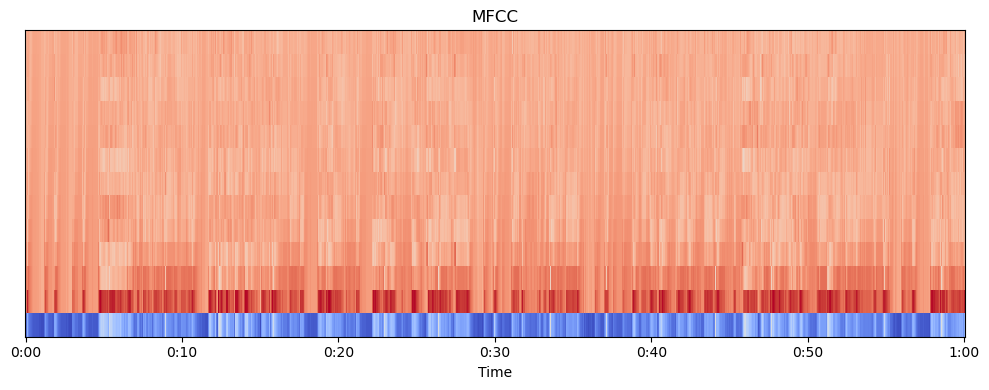

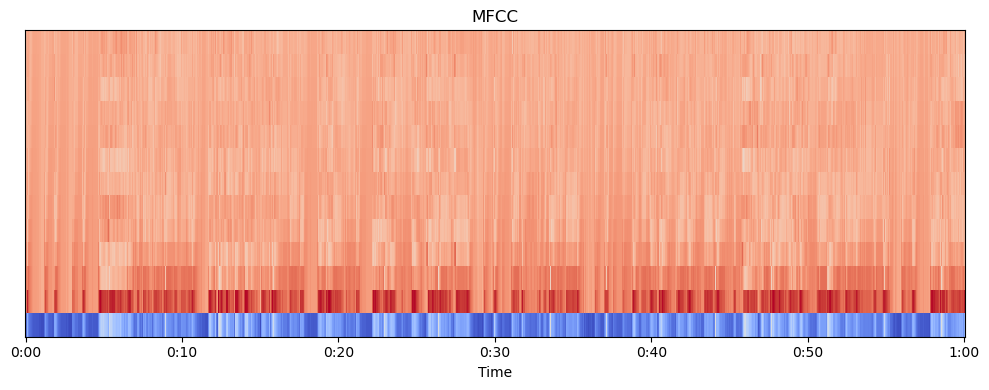

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [14]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs,x_axis='time')
plt.title('MFCC')
plt.tight_layout()

In [15]:
plt.savefig('MFCC.png', dpi=300, bbox_inches='tight')
plt.close()